# Hybrid - ARIMA - Combined_Forecast - Phase - IV

## Reading Data Set Again from the Excel

In [855]:
import pandas as pd
filtered_df = pd.read_excel('../../data/Lstm_Dates.xlsx')
# Replace all missing values (NaN) in the 'items' column with 'Rice (Rs/kg)_Nadu 2'
filtered_df['items'] = filtered_df['items'].fillna('Rice (Rs/kg)_Nadu 2')
filtered_df.head(15)

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,131.1,0.84,0.0,2.0,84.0
1,2019-06-01,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-02,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,134.5,9.28,0.0,2.0,84.0
4,2019-06-04,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-05,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83.0,134.5,4.34,0.0,5.0,80.5
7,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84.0,134.5,19.28,0.0,6.0,81.0
8,2019-06-08,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-06-09,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Use Interpolation to Fill Missing Values

In [856]:
# Time-based interpolation (useful for datetime indices)
filtered_df['pettah_average'] = filtered_df['pettah_average'].interpolate(method='linear', limit_direction='both')

In [857]:
test_df=filtered_df.iloc[1462:]

In [858]:
test_df.head(7)

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
1462,2023-06-01,Rice (Rs/kg)_Nadu 2,177.000000,175.0,180.0,306.41,12.56,1.0,5.0,177.5
1463,2023-06-02,Rice (Rs/kg)_Nadu 2,177.000000,175.0,180.0,306.41,8.23,1.0,5.0,177.5
1464,2023-06-03,Rice (Rs/kg)_Nadu 2,177.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465,2023-06-04,Rice (Rs/kg)_Nadu 2,178.066667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,2023-06-05,Rice (Rs/kg)_Nadu 2,178.600000,175.0,180.0,306.41,6.51,1.0,5.0,177.5
1467,2023-06-06,Rice (Rs/kg)_Nadu 2,176.000000,175.0,180.0,306.41,4.82,1.0,5.0,177.5
1468,2023-06-07,Rice (Rs/kg)_Nadu 2,175.000000,174.0,176.0,306.41,6.02,1.0,2.0,175.0


In [859]:
test_df = filtered_df.iloc[1462:1469][['date', 'pettah_average']]

## Data Frame Creation with 1462 Samples

In [860]:
# Creating a new DataFrame 'filtered_df' that consists only of the first 1462 values from the original 'data'
filtered_df = filtered_df.iloc[:1462].copy()

# Displaying the first few rows of filtered_df to confirm
filtered_df.head()


,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.000000,83.0,85.0,131.1,0.84,0.0,2.0,84.0
1,2019-06-01,Rice (Rs/kg)_Nadu 2,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-02,Rice (Rs/kg)_Nadu 2,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-03,Rice (Rs/kg)_Nadu 2,84.000000,83.0,85.0,134.5,9.28,0.0,2.0,84.0
4,2019-06-04,Rice (Rs/kg)_Nadu 2,83.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting the Pettah Average Price

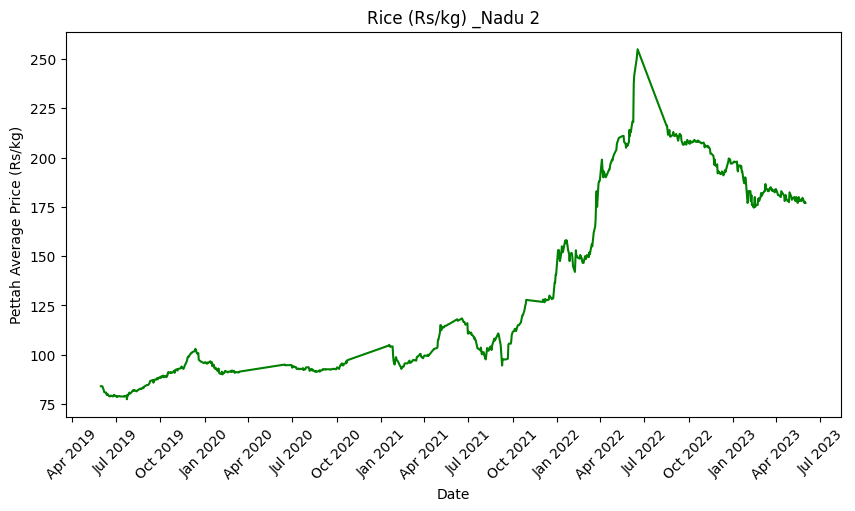

In [861]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Reset the index to make 'date' a regular column
filtered_df = filtered_df.reset_index()
# Ensure 'date' is a datetime object
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot pettah_average over time
sns.lineplot(data=filtered_df, x='date', y='pettah_average', ax=ax, color='green')

# Add titles and labels
ax.set_title('Rice (Rs/kg) _Nadu 2')
ax.set_xlabel('Date')
ax.set_ylabel('Pettah Average Price (Rs/kg)')

# Set x-axis format to show the month and year (e.g., Jan 2024)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the interval for x-axis ticks to every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Drop Features 

In [862]:
# filtered_df.drop(columns=['items','percipitation', 'pettah_min_value', 'pettah_max_value', 'food_inflation_Base_2013', 'Bankrupt',
#                           'percipitation','pettah_range','pettah_midpoint','pettah_avg_sma_150','pettah_avg_sma_14','ema_7','ema_30'], inplace=True)

filtered_df.drop(columns=['items', 'pettah_min_value',
       'pettah_max_value', 'food_inflation_Base_2013', 'percipitation',
       'Bankrupt', 'pettah_range', 'pettah_midpoint'], inplace=True)


In [863]:
filtered_df = filtered_df.drop('index', axis=1) 

In [864]:
filtered_df.tail(15)

,date,pettah_average
1447,2023-05-17,180.000000
1448,2023-05-18,179.000000
1449,2023-05-19,178.000000
1450,2023-05-20,178.250000
1451,2023-05-21,178.500000
1452,2023-05-22,178.750000
1453,2023-05-23,178.000000
1454,2023-05-24,179.000000
1455,2023-05-25,179.600000
1456,2023-05-26,179.000000


## Set Date into index Column 

In [865]:
# Convert 'date' column to datetime if it's not already
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set 'date' as the index of the DataFrame
filtered_df.set_index('date', inplace=True)

## Seasonal Decomposition

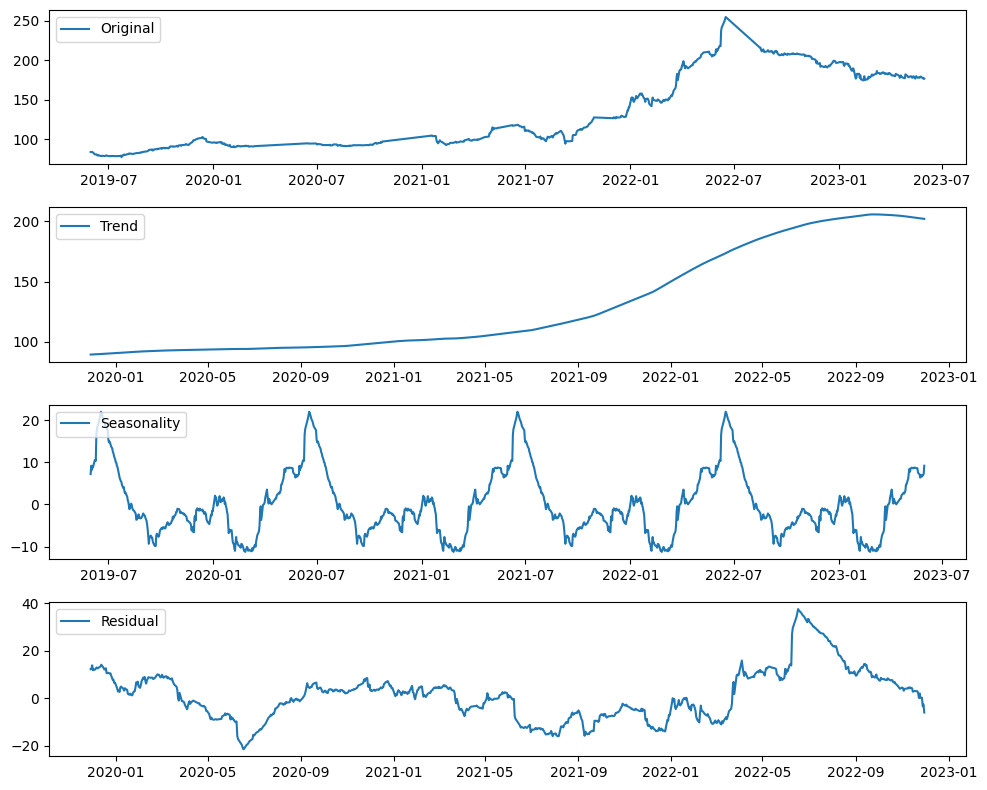

In [866]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition (additive model is often used for price data)
decomposition = seasonal_decompose(filtered_df['pettah_average'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(filtered_df['pettah_average'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Create Dataframe with Time Series Components

In [867]:
df = pd.DataFrame({
    'Trend': decomposition.trend,
    'Seasonal': decomposition.seasonal,
    'Residuals': decomposition.resid,
    'Original': decomposition.observed
})
df = df.reset_index()

df.head(7)

# df.to_csv('decomposition.csv', index=False)

,date,Trend,Seasonal,Residuals,Original
0,2019-05-31,NaN,7.198024,NaN,84.000000
1,2019-06-01,NaN,9.170049,NaN,84.000000
2,2019-06-02,NaN,8.146702,NaN,84.000000
3,2019-06-03,NaN,9.123415,NaN,84.000000
4,2019-06-04,NaN,8.766429,NaN,83.333333
5,2019-06-05,NaN,9.299002,NaN,82.666667
6,2019-06-06,NaN,9.831880,NaN,82.000000


## Forecast Trend

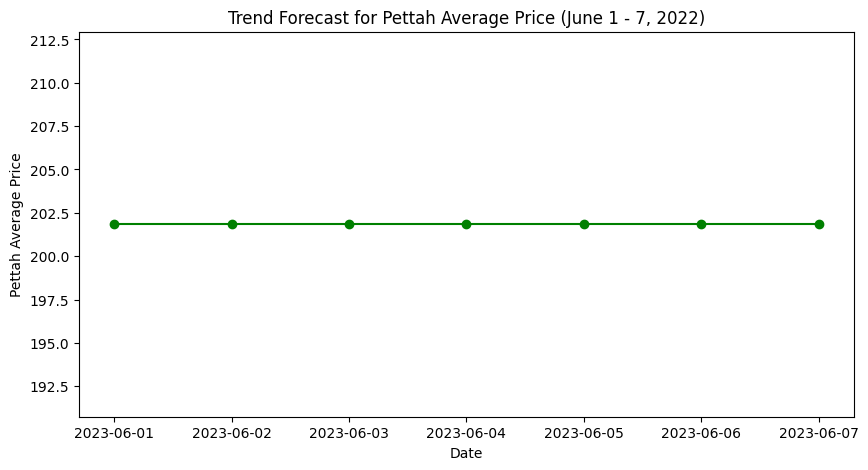

In [868]:
# Creating the trend forecast
forecast_horizon = 7

trend_last = decomposition.trend.dropna().iloc[-1]

trend_forecast = pd.Series([trend_last] * forecast_horizon, index=pd.date_range(start='2023-06-01', periods=forecast_horizon))

# Plot the trend forecast
plt.figure(figsize=(10, 5))
plt.plot(trend_forecast, label='Trend Forecast', color='green', marker='o')
plt.title("Trend Forecast for Pettah Average Price (June 1 - 7, 2022)")
plt.xlabel("Date")
plt.ylabel("Pettah Average Price")
plt.show()

## Get the Correct Seasonality Values for Forecast


In [869]:
# Seasonal values for June 1 to June 7 based on previous seasonal data
seasonal_values_june = decomposition.seasonal['2022-06-01':'2022-06-07'].values
print(seasonal_values_june)

[ 8.14670151  9.1234147   8.76642926  9.29900242  9.83188    10.36542728
 10.54390608]


## Forecast the Residuals Using ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

residuals = decomposition.resid.dropna()

# Forecast the residuals using ARIMA
arima_model = ARIMA(residuals, order=(1, 1, 1))
fitted_model = arima_model.fit()

residual_forecast = fitted_model.forecast(steps=forecast_horizon)

c:\Users\VenuraP\AppData\Local\anaconda3\envs\hartipredict\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\VenuraP\AppData\Local\anaconda3\envs\hartipredict\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\VenuraP\AppData\Local\anaconda3\envs\hartipredict\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Combined Forecast 

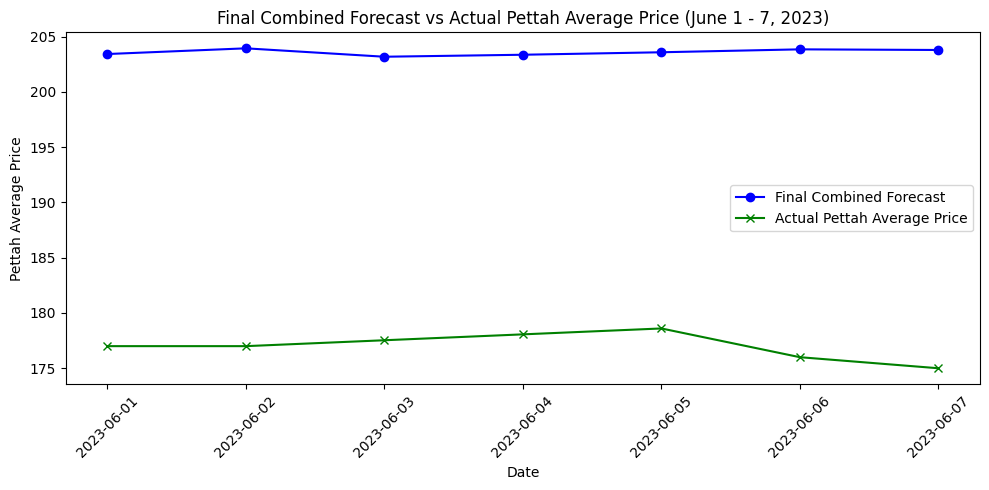

In [ ]:
import matplotlib.pyplot as plt

# Combine the forecast components
final_forecast = trend_forecast.values + seasonal_values_june + residual_forecast.values

# Create a Series for the final forecast with specific dates
final_forecast_series = pd.Series(final_forecast, index=pd.date_range(start='2023-06-01', periods=forecast_horizon))

# Ensure 'test_df' has 'date' in datetime format and is filtered for the same date range
test_df['date'] = pd.to_datetime(test_df['date'])
test_df_june = test_df.set_index('date').loc['2023-06-01':'2023-06-07']

# Plotting the forecast and the actual values from test_df
plt.figure(figsize=(10, 5))

# Plot the forecasted values
plt.plot(final_forecast_series, label='Final Combined Forecast', color='blue', marker='o')

# Plot the actual values from test_df
plt.plot(test_df_june.index, test_df_june['pettah_average'], label='Actual Pettah Average Price', color='green', marker='x')

# Add titles and labels
plt.title("Final Combined Forecast vs Actual Pettah Average Price (June 1 - 7, 2023)")
plt.xlabel("Date")
plt.ylabel("Pettah Average Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
